# Simple Linear Regression

## Cereal Nutritional Rating against Sugar Content

Being the cereal enthusiasts we are, we might be interested in knowing what sort of relationship exists between a cereal's nutrition rating and its sugar content. Therefore, we can turn to using a simple linear regression. Using a linear model, we would also be able to look at any given cereal's sugar content, and attempt to make an estimation as to what its nutritional rating will be. Usually you'll want to throw together a scatterplot to see if a linear regression is worth your time, but given the context of the chapter, we know what we're jumping into, so we'll make the assumption that a linear regression works.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.api as sm
from IPython.display import display

seaborn.set()
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.precision', 2)
%matplotlib inline
plt.rcParams['figure.figsize'] = 8, 7

In [27]:
#Load dataset into dataframe
df = pd.read_csv("cereals.csv")

In [29]:
display(df.head())

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.40,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.98,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.43,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.70,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.38,1,0,0,0,0,1,0


In [5]:
sugars = df['Sugars'].values

In [6]:
sugars

array([  6.,   8.,   5.,   0.,   8.,  10.,  14.,   8.,   6.,   5.,  12.,
         1.,   9.,   7.,  13.,   3.,   2.,  12.,  13.,   7.,   0.,   3.,
        10.,   5.,  13.,  11.,   7.,  10.,  12.,  12.,  15.,   9.,   5.,
         3.,   4.,  11.,  10.,  11.,   6.,   9.,   3.,   6.,  12.,   3.,
        11.,  11.,  13.,   6.,   9.,   7.,   2.,  10.,  14.,   3.,   0.,
         0.,   6.,  nan,  12.,   8.,   6.,   2.,   3.,   0.,   0.,   0.,
        15.,   3.,   5.,   3.,  14.,   3.,   3.,  12.,   3.,   3.,   8.])

In [7]:
rating = df['Rating'].values

In [8]:
rating

array([ 68.402973,  33.983679,  59.425505,  93.704912,  34.384843,
        29.509541,  33.174094,  37.038562,  49.120253,  53.313813,
        18.042851,  50.764999,  19.823573,  40.400208,  22.736446,
        41.445019,  45.863324,  35.782791,  22.396513,  40.448772,
        64.533816,  46.895644,  36.176196,  44.330856,  32.207582,
        31.435973,  58.345141,  40.917047,  41.015492,  28.025765,
        35.252444,  23.804043,  52.076897,  53.371007,  45.811716,
        21.871292,  31.072217,  28.742414,  36.523683,  36.471512,
        39.241114,  45.328074,  26.734515,  54.850917,  37.136863,
        34.139765,  30.313351,  40.105965,  29.924285,  40.69232 ,
        59.642837,  30.450843,  37.840594,  41.50354 ,  60.756112,
        63.005645,  49.511874,  50.828392,  39.259197,  39.7034  ,
        55.333142,  41.998933,  40.560159,  68.235885,  74.472949,
        72.801787,  31.230054,  53.131324,  59.363993,  38.839746,
        28.592785,  46.658844,  39.106174,  27.753301,  49.787

Notice that nan in the sugars array? One of the cereals is missing content for the sugar column, so we will have to get rid of this record. We're really only working with sugars and rating, so that's where we will delete the record from, but we could just as well delete it from the dataframe if that is what we were using to access the data. The first step is to find its index, which we will then use in our delete methods.

In [9]:
#Book code shows record 58; R's indexing starts at 1, unlike Python's, which starts at 0
indx = np.argwhere(np.isnan(sugars))
print(indx)

[[57]]


In [10]:
#Deleting the single null record from the sugars and rating arrays
sugars = np.delete(sugars, 57)
rating = np.delete(rating, 57)

In [11]:
len(rating)

76

In [12]:
len(sugars)

76

Now that these two arrays are confirmed to be the same length, they can be used in calculating the linear model.

In [13]:
sugars2 = sm.add_constant(sugars)
lm = sm.OLS(rating, sugars2)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     103.7
Date:                Mon, 17 Jul 2017   Prob (F-statistic):           1.01e-15
Time:                        11:42:23   Log-Likelihood:                -275.21
No. Observations:                  76   AIC:                             554.4
Df Residuals:                      74   BIC:                             559.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         59.8530      1.998     29.964      0.000        55.873    63.833
x1            -2.4614      0.242    -10.183      0.000        -2.943    -1.980
==============================================================================
Omnibus:                       12.448   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.427
Skew:                           0.787   Prob(JB):                     0.000737
Kurtosis:                       4.441   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Model Summary

This summary contains a lot of useful information. R-squared gives us a proportion of variance that is explained by the regression. Ranging from 0 to 1 (think 0% to 100%), 1 is more desirable, as it suggests the model does explain all variability of the data around the mean—it suggests the model fits your data well. The adjusted R-squared does the same, but factors in the number of of observations and the degrees of freedom. This linear model doesn't appear to be great, as only 59% of the cereals' nutritional ratings are explained by sugar content, but it isn't too bad either.

The p-value however is significant for sugar (x1) which permits us to reject our null hypothesis (that there is no relationship between sugar and nutritional rating). And looking at the constant and coefficient, we can say that the estimated cereal rating equals 59.8530 minus 2.4614 times the sugar content in grams, or in other words, nutritional value declines as sugar content increases.

In [14]:
#Returns the constant and coefficient
lm.params

array([ 59.85301691,  -2.46142021])

Since the model is a good enough fit, we can use it for some degree of predictive power. So let's say we're going to market with a new cereal that will have 1 gram of sugar. That can be simply calculated with the formula y_hat = 59.8530 + -2.4614\*(1). As shown directly below, we can predict that the cereal will have a nutritional rating of 57.3916.

In [34]:
y = 59.8530 + -2.4614*(1)
y

57.391600000000004

In [15]:
new_line = np.linspace(sugars.min(), sugars.max())
new_line = sm.add_constant(new_line)
y_hat = lm.predict(new_line)

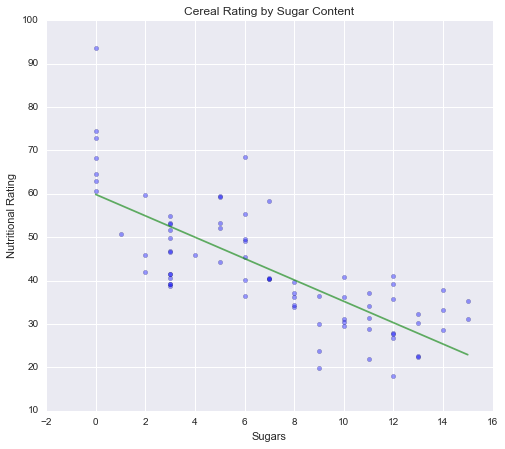

In [32]:
plt.scatter(sugars, rating, alpha = 0.4)
plt.xlabel("Sugars")
plt.ylabel("Nutritional Rating")
plt.title("Cereal Rating by Sugar Content")
plt.plot(new_line[:, 1], y_hat, 'g', alpha=0.6)

# Residuals and Leverage

If we saw that some bizarre observation held a lot of weight over the model and may have been throwing it off, we can take a look at the residuals and the leverage that the observations hold. This dataset doesn't seem too problematic, but in some case, there might be a cereal that has like 60 grams of sugar, far out from all of the others. If that were the case, the model would be completely different, likely to the detriment of its predictive power. While there are some hefty residuals here (like the first cereal being 23.318 rating points away from the predicted rating), the cereals are fine and don't hold any atypical or unwanted influences on the model. This is confirmed below using the *get_influence* method.

In [17]:
lm.resid

array([ 23.31847736,  -6.17797621,  11.87958915,  33.85189509,
        -5.77681221,  -5.72927379,   7.78096006,  -3.12309321,
         4.03575736,   5.76789715, -12.27312337,  -6.6265977 ,
       -17.876662  ,  -2.22286743,  -5.11810815, -11.02373727,
        -9.06685249,   5.46681663,  -5.45804115,  -2.17430343,
         4.68079909,  -5.57311227,   0.93738121,  -3.21505985,
         4.35302785,  -1.34142158,  15.72206557,   5.67823221,
        10.69951763,  -2.29020937,  12.32073027, -13.896192  ,
         4.53098115,   0.90225073,  -4.19562006, -10.90610258,
        -4.16659779,  -4.03498058,  -8.56081264,  -1.228723  ,
       -13.22764227,   0.24357836,  -3.58145937,   2.38216073,
         4.35946842,   1.36237042,   2.45879685,  -4.97853064,
        -7.77595   ,  -1.93075543,   4.71266051,  -4.78797179,
        12.44746006, -10.96521627,   0.90309509,   3.15262809,
         4.42737836,   8.94322263,  -0.45825521,  10.24864636,
       -12.93124349, -11.90859727,   8.38286809,  14.61

In [18]:
#Remember, R's indexing starts at 1, so to get the 12th record, Python uses 11 instead of 12
lm.resid[11]

-6.6265976986200883

The *get_influence* method calculates the actual influence of every observation (in our case, every cereal). It does so by taking into account the standardized residuals ((y - y_hat) / standard_error_ith_residual) and the leverage (observations with extreme x-values, like the previous example of 60 grams of sugar), calculated as (1 / n) + ((x - x_bar)^2 / Sum(x - x_bar)^2).

Observations tend to be influential if in some capacity, they have a higher residual *and* some leverage. Not all outliers are influential, and not all points with leverage are influential. But if some observation is suspicious, *Cook's Distance* can determine the influence of your observations. Typically, if an observation's *Cook Distance* comes out greater than 1, it is influential.

In [24]:
infl = lm.get_influence()

In [25]:
print(infl.summary_table())

       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0     10.000      5.718      0.003      0.681      0.007      0.057      0.671      0.057
         1     11.000      8.577      0.002      0.387      0.016      0.049      0.377      0.048
         2     12.000     11.437      0.000      0.091      0.028      0.015      0.088      0.015
         3     13.000     14.296      0.002     -0.210      0.044     -0.045     -0.204     -0.044
         4     14.000     17.155      0.018     -0.517      0.063     -0.134     -0.509     -0.132
         5     15.000     20.014      0.065     -0.832      0.086     -0.256     -0.829     -0.255
         6     16.000     22.873      0.170     -1.157      0.113     -0.412     -1.184     -0.422
         7

As none of the *Cook's Distance* values are greater than 1, we're likely safe from any needlessly influential observations in this sample.

## Inference and Model Building

Typically when one wants to make more confident inferences, or build and deploy a functioning model, more must be done than just these steps. Validation of the model and its assumptions is an absolute necessity, otherwise expensive errors can be made along the line. These steps are solid for a sample, but across samples, the error differs. A true population regression will minimize the error across all of these samples, for the true best fit.

## Inference and Extrapolation

Extrapolation should be avoided if possible when doing regression analysis. And if a prediction outside of the range of given x-values must be completed, a disclaimer should be provided that no x-data is available to support the prediction. This is because a relationship between x and y might exist within the sample's range, but once outside of that range, the behavior completely changes. For example, say there is a linear relationship between height and weight, and the data provided is from people that are 5'0'' to 6'6''. An extrapolation to somebody that is 7'0'' tall might work, but if we try to use this linear equation on somebody that is 1'0'', it's destined to fail. And with that, I leave you xkcd:

![Extrapolation](https://i.stack.imgur.com/u5HhK.png)



**Useful Resources:**
* [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/index.html) Chapter 3 of this book goes into the theory and mathematics of linear regressions, going in-depth with important concepts like minimizing errors and assumptions of linear models.
* [Kevin Markham's Notebook on Linear Regressions](https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb) This notebook utilizes Python to work through regressions for the ISL linear regression example. R code *should* be found with a little Googling.
* [Peter Prettenhofer's Walkthrough](https://www.datarobot.com/blog/ordinary-least-squares-in-python/) This is another Python resource in going through an ordinary least-squares regression. It's useful for seeing as many examples as possible, and this too does well in explaining the steps and returns.